In [49]:
my_mat = [["T","M","M","M","T","T","T"],
          ["M","M","M","M","T","M","M"],
          ["T","T","M","T","T","M","T"],
          ["T","M","M","T","M","M","M"],
          ["T","T","T","T","T","T","M"],
          ["T","T","T","T","T","T","M"]]

In [189]:
my_mat = [["T","T","T","T","T"],
          ["T","M","M","M","T"],
          ["T","T","T","T","T"]]

In [190]:
mat2 = []
for line in my_mat:
    mat3 = []
    for elem in line:
        if elem == "T":
            mat3.append(1)
        else:
            mat3.append(-1)
    mat2.append(mat3)
print(mat2)

[[1, 1, 1, 1, 1], [1, -1, -1, -1, 1], [1, 1, 1, 1, 1]]


In [191]:
import numpy as np
import itertools

In [192]:
def pad_with(vector, pad_width, iaxis, kwargs):
...     pad_value = kwargs.get('padder', 0)
...     vector[:pad_width[0]] = pad_value
...     vector[-pad_width[1]:] = pad_value
...     return vector

In [193]:
padded = np.matrix(np.pad(mat2,1, pad_with))
print(padded)

[[ 0  0  0  0  0  0  0]
 [ 0  1  1  1  1  1  0]
 [ 0  1 -1 -1 -1  1  0]
 [ 0  1  1  1  1  1  0]
 [ 0  0  0  0  0  0  0]]


In [194]:
print(padded[0:3,0:3])
print(np.multiply(padded[0:3,0:3],np.matrix([[3,3,3],[3,3,3],[3,3,3]])))

[[ 0  0  0]
 [ 0  1  1]
 [ 0  1 -1]]
[[ 0  0  0]
 [ 0  3  3]
 [ 0  3 -3]]


In [196]:
conv_mat= []
for fila in range(1,padded.shape[0]-1):
    conv = []
    for columna in range(1,padded.shape[1]-1):
        #wind = 2**abs(np.sum(padded[fila-1:fila+2, columna-1:columna+2]))
        wind = (np.sum(padded[fila-1:fila+2, columna-1:columna+2]))
        conv.append(wind)
    conv_mat.append(conv)
print(np.matrix(conv_mat))

[[2 2 0 2 2]
 [4 5 3 5 4]
 [2 2 0 2 2]]


In [157]:
conv_mat = np.matrix(conv_mat)
my_mat2 = np.matrix(my_mat)

In [158]:
def is_valid(windows):
    content = set(list(itertools.chain.from_iterable(windows.tolist())))
    return(all(i in content for i in ["T","M"]))

In [159]:
def convolve(matrix, row, col):
    convol = []
    valid = []
    validconv = []
    for rows in range(matrix.shape[0] - row+1):
        byrow = []
        valid2 = []
        for columns in range(matrix.shape[1] -col+1):
            window = matrix[rows:rows+row,columns:columns+col]
            byrow.append(np.sum(window))
            window = my_mat2[rows:rows+row,columns:columns+col]
            valid2.append(is_valid(window))
        convol.append(byrow)
        valid.append(valid2)
        validconv1 = (np.multiply(np.matrix(byrow),np.matrix([int(x) for x in valid2])))
        validconv.append(validconv1.tolist()[0])
    return validconv

In [160]:
#slices = [(1,5),(5,1),(1,4),(4,1),(1,3),(3,1),(1,2),(2,1),(2,2)]
slices = [(1,3),(3,1),(1,2),(2,1),(2,2),(2,3),(3,2)]

conv_dict = {}
for slic in slices:
    print(slic)
    conv_dict[slic] = convolve(conv_mat,slic[0],slic[1])

(1, 3)
(3, 1)
(1, 2)
(2, 1)
(2, 2)
(2, 3)
(3, 2)


In [161]:
def try_value(coord, mat):
    try:
        return mat[coord[0]][coord[1]]
    except:
        return 0

In [182]:
def scoring(coord, mat):
    score_list = []
    for slic in mat:
        #print(try_value(coord, mat[slic]))
        score_list.append(try_value(coord, mat[slic]))
    print(score_list)
    if sum(score_list) > 0:
        return score_list.index(max(score_list))
    else:
        return None

In [183]:
print(scoring((2,2),conv_dict))

for slic in conv_dict:
    print(slic)
    print(conv_dict[slic])

[0, 0, 0, 0, 0, 0, 0]
None
(1, 3)
[[0, 0, 0], [12, 0, 12], [0, 0, 0]]
(3, 1)
[[0, 9, 3, 9, 0]]
(1, 2)
[[0, 0, 0, 0], [9, 0, 0, 9], [0, 0, 0, 0]]
(2, 1)
[[0, 7, 3, 7, 0], [0, 7, 3, 7, 0]]
(2, 2)
[[13, 10, 10, 13], [13, 10, 10, 13]]
(2, 3)
[[16, 17, 16], [16, 17, 16]]
(3, 2)
[[17, 12, 12, 17]]


In [184]:
#print(list(conv_dict.keys())[0][1])
def update_coverage(cover, pos, slic, flag):
    for rows in range(pos[0],pos[0]+slic[0]):
        for col in range(pos[1],pos[1]+slic[1]):
            cover[rows,col] = flag
            #print(cover)
    return cover

In [185]:
def traverse(matrix, dicty):
    row_max = matrix.shape[0]
    col_max = matrix.shape[1]
    covered = np.zeros((row_max,col_max))
    flag = 0
    for row in range(row_max):
        for col in range(col_max):
            if covered[row,col] == 0:
                print((row,col))
                tag = scoring((row,col), dicty)
                if tag != None:
                    flag +=1
                    slic = list(dicty.keys())[tag]
                    print((flag,slic))
                    covered = update_coverage(covered, (row,col), slic, flag)
    return(covered)

In [186]:
cov = traverse(conv_mat, conv_dict)
print(np.matrix(cov))

(0, 0)
[0, 0, 0, 0, 13, 16, 17]
(1, (3, 2))
(0, 2)
[0, 3, 0, 3, 10, 16, 12]
(2, (2, 3))
(2, 2)
[0, 0, 0, 0, 0, 0, 0]
(2, 3)
[0, 0, 0, 0, 0, 0, 0]
(2, 4)
[0, 0, 0, 0, 0, 0, 0]
[[1. 1. 2. 2. 2.]
 [1. 1. 2. 2. 2.]
 [1. 1. 0. 0. 0.]]


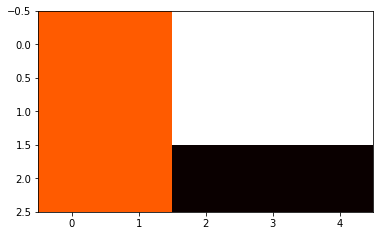

In [187]:
import matplotlib.pyplot as plt
plt.imshow(np.matrix(cov), cmap='hot', interpolation='nearest')
plt.show()